<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02192019_4%5D_Tensorflow_MNIST_Hand_Writing_Digit_Demo_MLP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("official/mnist/dataset.py",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting official/mnist/dataset.py/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting official/mnist/dataset.py/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting official/mnist/dataset.py/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting official/mnist/dataset.py/t10k-labels-idx1-ubyte.gz
Instructions for updating:


In [2]:
print('train images :',mnist.train.images.shape,
     'labels:',mnist.train.labels.shape)
print('validation images :',mnist.validation.images.shape,
     'labels:',mnist.validation.labels.shape)
print('test images :',mnist.test.images.shape,
     'labels:',mnist.test.labels.shape)

train images : (55000, 784) labels: (55000, 10)
validation images : (5000, 784) labels: (5000, 10)
test images : (10000, 784) labels: (10000, 10)


# Model Construction

In [0]:
def layer(output_dim,input_dim,inputs,activation=None):
  W=tf.Variable(tf.random_normal([input_dim,output_dim]))
  b=tf.Variable(tf.random_normal([1,output_dim]))
  XWb=tf.matmul(inputs,W)+b
  if activation is None:
    outputs = XWb
  else:
    outputs=activation(XWb)
  return outputs

In [4]:
'''
x=tf.placeholder("float",[None,784])
h1=layer(output_dim=256,input_dim=784,inputs=x,activation=tf.nn.relu)
y_predict=layer(output_dim=10,input_dim=256,inputs=h1,activation=None)

'''
x=tf.placeholder("float",[None,784])
h1=layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)
h2=layer(output_dim=1000,input_dim=1000,inputs=h1,activation=tf.nn.relu)
y_predict=layer(output_dim=10,input_dim=1000,inputs=h1,activation=None)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
y_label = tf.placeholder('float',[None,10])

In [6]:
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [0]:
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

In [0]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float'))

# Training

In [0]:
trainEpochs = 15
batchSize = 100
totalBatchs =int(mnist.train.num_examples/batchSize)
loss_list=[];epoch_list=[];accuracy_list=[]
from time import time
startTime=time()

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
for epoch in range(trainEpochs):
  for i in range(totalBatchs):
    batch_x,batch_y=mnist.train.next_batch(batchSize)
    sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
    
  loss,acc=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
  
  epoch_list.append(epoch)
  loss_list.append(loss)
  accuracy_list.append(acc)
  print('Train Epoch:',  '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss),'Accuracy=',acc)
  
duration =time()-startTime
print("Train Finished takes :",duration)

Train Epoch: 01 Loss= 9.587373734 Accuracy= 0.8828
Train Epoch: 02 Loss= 6.622679710 Accuracy= 0.9104
Train Epoch: 03 Loss= 4.781264782 Accuracy= 0.9318
Train Epoch: 04 Loss= 4.182820320 Accuracy= 0.9392
Train Epoch: 05 Loss= 3.523008585 Accuracy= 0.9434
Train Epoch: 06 Loss= 3.472052813 Accuracy= 0.942
Train Epoch: 07 Loss= 3.364296198 Accuracy= 0.9418
Train Epoch: 08 Loss= 2.985414028 Accuracy= 0.9512
Train Epoch: 09 Loss= 2.847352743 Accuracy= 0.952
Train Epoch: 10 Loss= 2.716128826 Accuracy= 0.9522
Train Epoch: 11 Loss= 2.740349054 Accuracy= 0.9518
Train Epoch: 12 Loss= 2.883555651 Accuracy= 0.949
Train Epoch: 13 Loss= 2.619930029 Accuracy= 0.9544
Train Epoch: 14 Loss= 2.585843086 Accuracy= 0.9574
Train Epoch: 15 Loss= 2.397513390 Accuracy= 0.9572
Train Finished takes : 27.81316041946411


# Evaluation

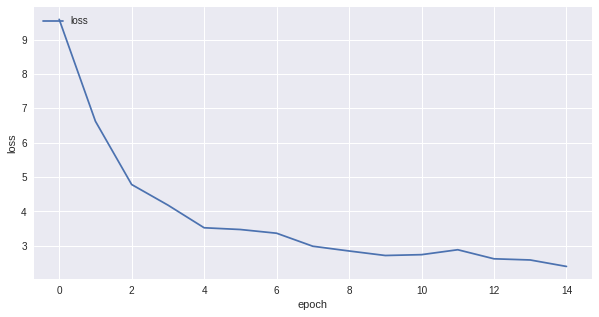

In [12]:
#%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

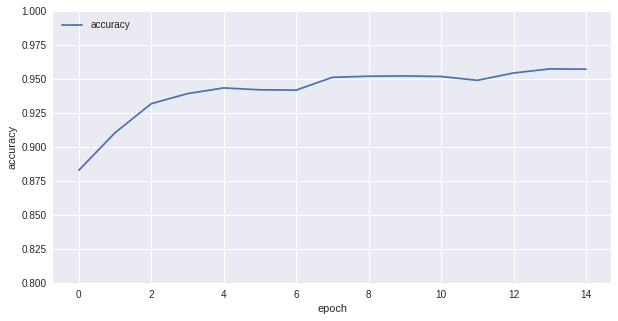

In [13]:
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.plot(epoch_list,accuracy_list,label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.8,1)
plt.legend(['accuracy'],loc='upper left')

In [14]:
print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))

Accuracy: 0.9548


# Prediction

In [15]:
print(y_predict[:10])
prediction_result=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})
prediction_result[:10]

Tensor("strided_slice:0", shape=(?, 10), dtype=float32)


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

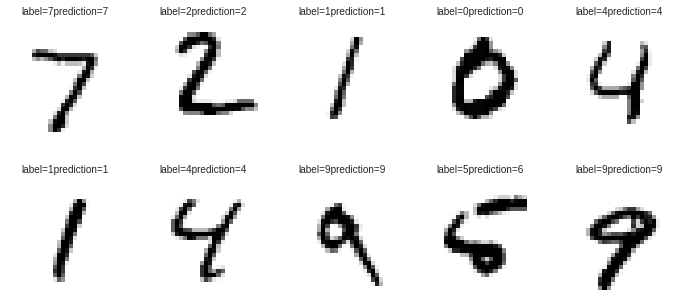

In [16]:
import numpy as np

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
    title='label='+str(np.argmax(labels[idx]))
    if len(prediction)>0:
      title+='prediction='+str(prediction[idx])
      
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,0)